In [15]:
%matplotlib inline

import pymysql
from config import *
from nltk.draw.dispersion import dispersion_plot 

In [16]:

#########
# Open a MySQL connection. Should be triggered by the caller before running
# the scraper, if the caller is using MySQL
#########
def openCon():
    global conn
    global cur
    conn = pymysql.connect(host=MYSQL_HOST, port=MYSQL_PORT, user=MYSQL_USER, passwd=MYSQL_PASSWORD, db='mysql', charset='utf8')

    cur = conn.cursor(pymysql.cursors.DictCursor)
    cur.execute("USE shakespeare")

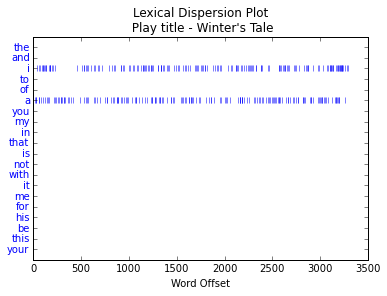

In [18]:
openCon()
cur.execute("Select * from words ORDER BY frequency DESC LIMIT 0, 20")
words = []
plays = {}
for row in cur:
    words.append(row['word'])
cur.execute("SET SESSION group_concat_max_len = 1000000;")
cur.execute("Select plays.id, plays.title, GROUP_CONCAT(lineText SEPARATOR ' ') AS fullSceneText from plays JOIN scenes ON plays.id = scenes.id JOIN sentences ON sentences.sceneId = scenes.id GROUP BY plays.id")
for row in cur:
    plays[row['title']] = row['fullSceneText']

for title,  text in plays.items():
    dispersion_plot(text, words, True, "Lexical Dispersion Plot \n Play title - " + title)
    break